In [24]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def read_df(file_path):
    df = pd.read_parquet(file_path)
    # df = df[df.trip_type==2]
    
    df["duration"] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df["duration"] = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]

    return df

In [4]:
jan_data = "/home/ubuntu/mlops-zoomcamp/notebooks/data/green_tripdata_2021-01.parquet"
feb_data = "/home/ubuntu/mlops-zoomcamp/notebooks/data/green_tripdata_2021-02.parquet"

df_train = read_df(jan_data)
df_val = read_df(feb_data)

In [13]:
categorical = ["PULocationID", "DOLocationID"]
numerical = ["trip_distance"]
# df[categorical] = df[categorical].astype('str')


dv = DictVectorizer()
train_dicts = df_train[categorical + numerical].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [17]:


target = "duration"
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_val)
mean_squared_error(y_val, y_preds, squared=False)

12.07867319860939

In [23]:
lr = Lasso(alpha=0.01)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_val)
mean_squared_error(y_val, y_preds, squared=False)

12.078676066689086

In [32]:
lr = Ridge(alpha=1000000)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_val)
mean_squared_error(y_val, y_preds, squared=False)

12.078735431469624

LinearRegression()

4.803126264559265

/tmp/ipykernel_2362/1777368126.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_preds, label="preds")
/home/ubuntu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_2362/1777368126.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function f

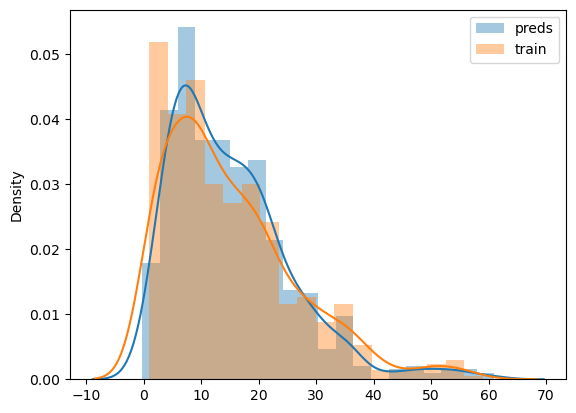

In [98]:
sns.distplot(y_preds, label="preds")
sns.distplot(y_train, label="train")

plt.legend()

In [47]:
df.duration.describe(percentiles=[0.90, 0.95, 0.98, 0.99])

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
90%        26.901667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

/home/ubuntu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


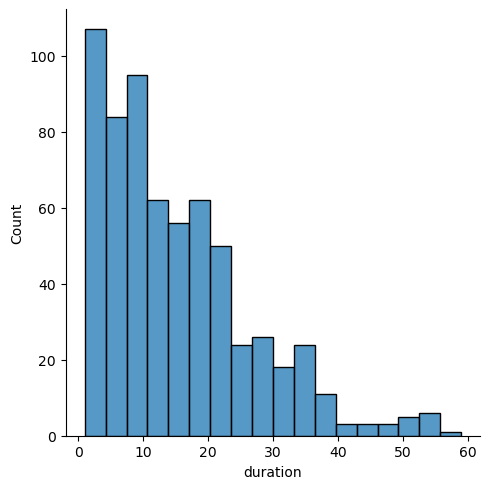

In [52]:
sns.displot(df.duration)

In [31]:
a.iloc[0].total_seconds() / 60

0.11666666666666667